In [1]:
import lvm_read
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import urllib

# Showcase of the package ``lvm_read``

Sep 2016, J. Slavič (janko.slavic@fs.uni-lj.si, [ladisk.si/~slavic](http://ladisk.si/~slavic))

## Download a sample file from github

In [2]:
filename = 'short.lvm'
#filename = 'long.lvm'
#filename = 'with_empty_fields.lvm'
#filename = 'multi_time_column.lvm'

sample_file = urllib.request.urlopen('https://raw.githubusercontent.com/openmodal/lvm_read/master/data/'+filename).read()

Raw output of the sample

In [3]:
sample_file

b'LabVIEW Measurement\t\nWriter_Version\t2\nReader_Version\t2\nSeparator\tTab\nDecimal_Separator\t,\nMulti_Headings\tYes\nX_Columns\tNo\nTime_Pref\tAbsolute\nOperator\tJS\nDate\t2013/02/19\nTime\t09:51:39,1970510124996275989\n***End_of_Header***\t\n\t\nChannels\t2\t\t\nSamples\t10\t10\t\nDate\t2013/02/19\t2013/02/19\t\nTime\t09:51:40,7271890640258789063\t09:51:40,7271890640258789063\t\nY_Unit_Label\tNewtons\tm/s^2\t\nX_Dimension\tTime\tTime\t\nX0\t0,0000000000000000E+0\t0,0000000000000000E+0\t\nDelta_X\t3,906250E-5\t3,906250E-5\t\n***End_of_Header***\t\t\t\nX_Value\tExcitation (Trigger)\tResponse (Trigger)\tComment\n\t0,914018\t1,204792\n\t0,537321\t1,208403\n\t0,616905\t1,213915\n\t0,895449\t1,212205\n\t0,574460\t1,222088\n\t0,516099\t1,218223\n\t1,046658\t1,213408\n\t0,394070\t1,221011\n\t0,741586\t1,211888\n\t0,680572\t1,212775\n'

Save it localy:

In [43]:
with open(filename, 'wb') as f:
    f.write(sample_file)

## Open the sample with ``lvm_read``

In [9]:
%%timeit
lvm = lvm_read.read('.\\data\\'+filename, read_from_pickle=False)

100 loops, best of 3: 2.86 ms per loop


Header of the lvm file

In [8]:
lvm.keys()

dict_keys([0, 'Segments', 'Reader_Version', 'Date', 'Decimal_Separator', 'Separator', 'Time', 'Writer_Version', 'X_Columns', 'Time_Pref', 'Operator', 'Multi_Headings'])

E.g.: number of segments in the lvm file:

In [46]:
lvm['Segments']

1

## Segment details

Segments are accessed by index

In [47]:
lvm[0]

{'Channel names': ['Excitation (Trigger)', 'Response (Trigger)', 'Comment'],
 'Channels': 2,
 'Date': ['2013/02/19', '2013/02/19', ''],
 'Delta_X': [3.90625e-05, 3.90625e-05, nan],
 'Samples': [10, 10, nan],
 'Time': ['09:51:40,7271890640258789063', '09:51:40,7271890640258789063', ''],
 'X0': [0.0, 0.0, nan],
 'X_Dimension': ['Time', 'Time', ''],
 'Y_Unit_Label': ['Newtons', 'm/s^2', ''],
 'data': array([[ 0.914018,  1.204792],
        [ 0.537321,  1.208403],
        [ 0.616905,  1.213915],
        [ 0.895449,  1.212205],
        [ 0.57446 ,  1.222088],
        [ 0.516099,  1.218223],
        [ 1.046658,  1.213408],
        [ 0.39407 ,  1.221011],
        [ 0.741586,  1.211888],
        [ 0.680572,  1.212775]])}

In [48]:
lvm[0]

{'Channel names': ['Excitation (Trigger)', 'Response (Trigger)', 'Comment'],
 'Channels': 2,
 'Date': ['2013/02/19', '2013/02/19', ''],
 'Delta_X': [3.90625e-05, 3.90625e-05, nan],
 'Samples': [10, 10, nan],
 'Time': ['09:51:40,7271890640258789063', '09:51:40,7271890640258789063', ''],
 'X0': [0.0, 0.0, nan],
 'X_Dimension': ['Time', 'Time', ''],
 'Y_Unit_Label': ['Newtons', 'm/s^2', ''],
 'data': array([[ 0.914018,  1.204792],
        [ 0.537321,  1.208403],
        [ 0.616905,  1.213915],
        [ 0.895449,  1.212205],
        [ 0.57446 ,  1.222088],
        [ 0.516099,  1.218223],
        [ 1.046658,  1.213408],
        [ 0.39407 ,  1.221011],
        [ 0.741586,  1.211888],
        [ 0.680572,  1.212775]])}

In [49]:
lvm[0]['data']

array([[ 0.914018,  1.204792],
       [ 0.537321,  1.208403],
       [ 0.616905,  1.213915],
       [ 0.895449,  1.212205],
       [ 0.57446 ,  1.222088],
       [ 0.516099,  1.218223],
       [ 1.046658,  1.213408],
       [ 0.39407 ,  1.221011],
       [ 0.741586,  1.211888],
       [ 0.680572,  1.212775]])

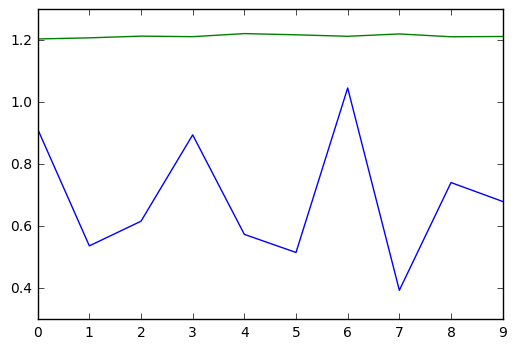

In [50]:
plt.plot(lvm[0]['data']);